こんにちは、TrueBlueです。今回は、Pythonで綺麗なグラフを書くことをテーマに、話していきたいなと思います。

まずは、必要なライブラリをインポートします。numpyをnpと略してインポートします。matplotライブラリーの中のpyplotをpltとしてインポートします。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

numpyの使い方を確認しておきましょう。
まず、array関数でただの配列をnumpy配列に変換できます。

In [2]:
np.array([0,1,2,3,4,5,6,7,8,9])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

いちいちこのように宣言するのは手間がかかります。そこで、もっと簡単にnumpy配列を作成する方法を紹介します。まずは、arange関数から。これは0～N-1の整数を列挙したnumpy配列を作ります。

In [3]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

このケースでは、0～9までが入った配列が出来ていますね

linspace関数は、開始値から終了値までをN分割する関数です。

In [4]:
np.linspace(0, 1, 11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

この例では、0～1を11分割しています。なお、両端を含むことに注意してください！

次に、今回のグラフ作成においては使わないですが、知っておいた方が便利な関数を紹介します。percentile関数と言い、値をソートして並べた際のN%部分の値を抽出する関数です。50%なら中央値、25%や75%なら四分位数となります。
なお、実際の四分位数の計算とは計算法が少し違うので、注意が必要です。

In [5]:
data=np.array([1, 2, 4, 5, 6, 7, 13, 15, 18])
print(data)
print(np.percentile(data, 25))
print(np.percentile(data, 50))
print(np.percentile(data, 75))

[ 1  2  4  5  6  7 13 15 18]
4.0
6.0
13.0


今回のケースだと、中央値は6で、25%点は4、75%点は13となっています。くどいようですが、通常の四分位数の計算とは少し算出方法が違っていますので、注意してください。

さて、matplotライブラリを使うにあたって、理解しておく必要がある概念について話そうと思います。それがfigureとaxesについてです。figureは全てのグラフを纏めるもので。axesはグラフ一つ一つです。
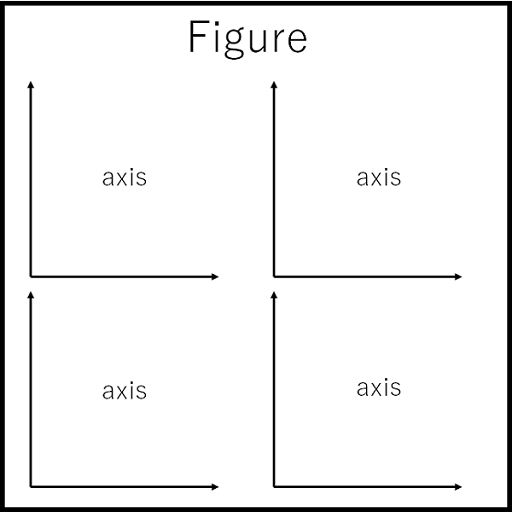

今回のケースでは、グラフを書く領域は縦4、横12と指定しています。ax1はFigureを縦1、横3に分割した際の1番目の領域に配置します。ax2やax3についても同様です。

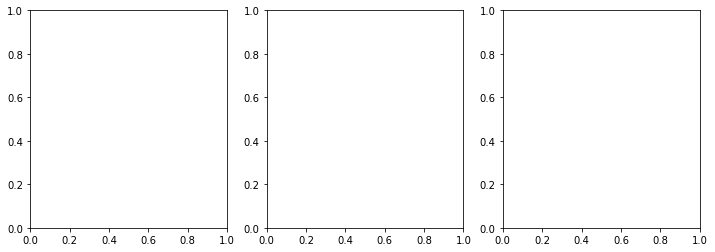

In [6]:
fig=plt.figure(figsize=(12,4))
ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)
plt.show()

このように、横長のfigureの中に三つのaxisが入っていることが分かります。

もちろん、縦が1個である必要はないです。次の例では、縦2個、横3個に区切って合計6マスを作成します。
また、5番目と6番目、つまり下の段の二つ目と三つ目は結合して、一つのグラフとしています。

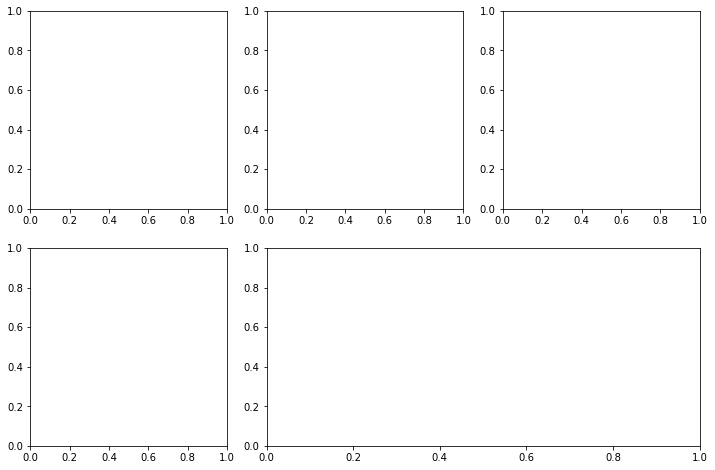

In [7]:
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,4)
ax56=fig.add_subplot(2,3,(5,6))
plt.show()

次にグラフにタイトルを付けましょう。figureにタイトルをつけるときは、suptitle関数を使います。一方、axesにタイトルを付けるときは、set_title関数を使います。

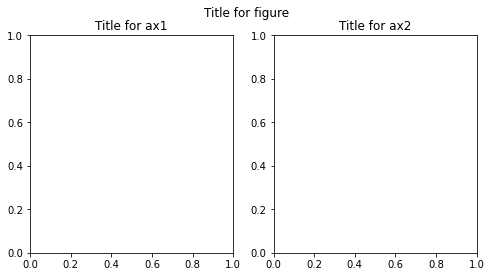

In [8]:
fig=plt.figure(figsize=(8,4))

fig.suptitle("Title for figure")
ax1=fig.add_subplot(1,2,1)
ax1.set_title("Title for ax1")
ax2=fig.add_subplot(1,2,2)
ax2.set_title("Title for ax2")

plt.show()

グラフの縦軸、横軸のラベルを設定しましょう。後で見た時に「このX軸、なんだっけ？」とならないように、出来る限り設定しておくことをお勧めします。
関数名はset_xlabelです。

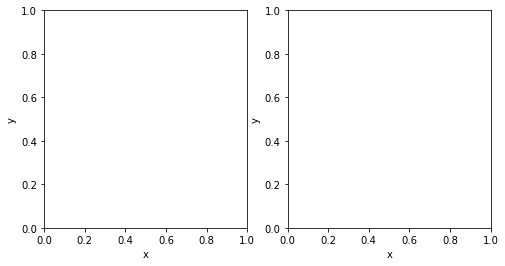

In [9]:
fig=plt.figure(figsize=(8,4))

ax1=fig.add_subplot(1,2,1)
ax1.set_xlabel("x")
ax1.set_ylabel("y")

ax2=fig.add_subplot(1,2,2)
ax2.set_xlabel("x")
ax2.set_ylabel("y")

plt.show()

上の例では、二つのグラフの間が詰まっていて見にくいです。グラフ間の余白を設定する方法として、fig.subplots_adjust()という関数があります。今回は、wspaceを指定して、width方向の余白を設定しています。

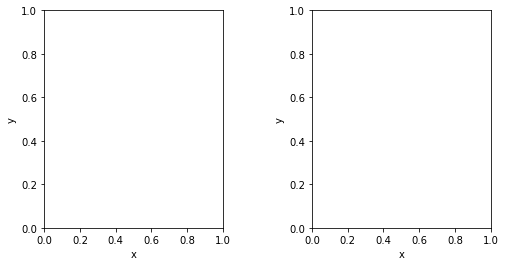

In [10]:
fig=plt.figure(figsize=(8,4))
fig.subplots_adjust(wspace=0.5)

ax1=fig.add_subplot(1,2,1)
ax1.set_xlabel("x")
ax1.set_ylabel("y")

ax2=fig.add_subplot(1,2,2)
ax2.set_xlabel("x")
ax2.set_ylabel("y")

plt.show()

無事、余白が出来ました。

いよいよ、グラフを書いていきます。まずは、折れ線グラフを書いてみようと思います。使う関数はplot関数です。

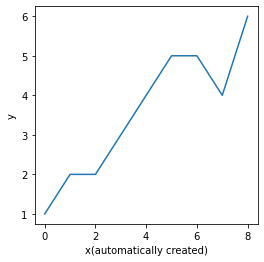

In [11]:
y=np.array([1,2,2,3,4,5,5,4,6])

fig=plt.figure(figsize=(4,4))
ax1=fig.add_subplot(1,1,1)

ax1.plot(y)
ax1.set_xlabel("x(automatically created)")
ax1.set_ylabel("y")

plt.show()

x軸は1～8ですが、これは自前で指定しなくても、自動的に作ってくれます。もちろん、自分で用意する事も可能です。

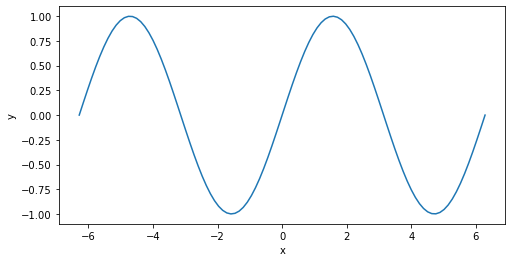

In [12]:
x=np.linspace(-np.pi*2, np.pi*2, 100)
y=np.sin(x)

fig=plt.figure(figsize=(8,4))
ax1=fig.add_subplot(1,1,1)

ax1.plot(x, y)
ax1.set_xlabel("x")
ax1.set_ylabel("y")

plt.show()

一つのaxisに対して複数回plot関数を適応すると、一つの座標軸内に複数の折れ線グラフが描かれます。下の例では、sin関数とcos関数を出力しています。

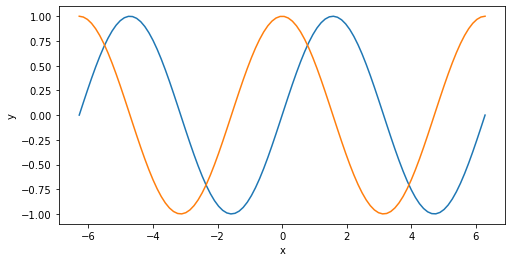

In [13]:
x=np.linspace(-np.pi*2, np.pi*2, 100)
y1=np.sin(x)
y2=np.cos(x)

fig=plt.figure(figsize=(8,4))
ax1=fig.add_subplot(1,1,1)

ax1.plot(x, y1)
ax1.plot(x, y2)
ax1.set_xlabel("x")
ax1.set_ylabel("y")

plt.show()

どの色が何を表しているのかをグラフ上に載せるにはlegend()という関数を使います。
これを書くことによって、グラフに名付けられた「ラベル」をグラフ内に描画することが出来ます。
下の例では、二本のグラフにそれぞれ名前を付け、それを出力するように設定しています。

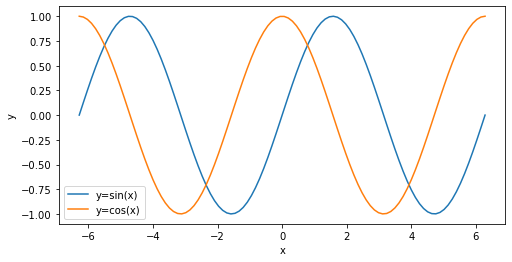

In [14]:
x=np.linspace(-np.pi*2, np.pi*2, 100)
y1=np.sin(x)
y2=np.cos(x)

fig=plt.figure(figsize=(8,4))
ax1=fig.add_subplot(1,1,1)

ax1.plot(x, y1, label="y=sin(x)")
ax1.plot(x, y2, label="y=cos(x)")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.legend()

plt.show()

グラフを作ったものの、その一部しか必要じゃない。そのようなときは、ax.set_xlimやax.set_ylim関数を使います。下の例では、先ほど作ったグラフの内、x軸が正の領域だけを切り出しています。

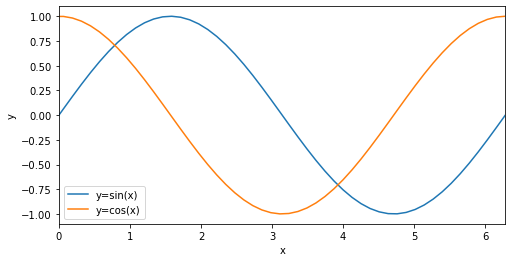

In [15]:
x=np.linspace(-np.pi*2, np.pi*2, 100)
y1=np.sin(x)
y2=np.cos(x)

fig=plt.figure(figsize=(8,4))
ax1=fig.add_subplot(1,1,1)

ax1.plot(x, y1, label="y=sin(x)")
ax1.plot(x, y2, label="y=cos(x)")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_xlim((0, np.pi*2))
ax1.legend()

plt.show()

最後に、折れ線グラフを装飾することについて説明します。
markerを指定すると、折れ線グラフ内と共に点がプロットされるようになります。oで丸印、*で星印になります。他にも色々りますが、割愛させて頂きます。
また、colorで色を指定できます。linestyleで線の種類、markersizeで点の大きさを指定できます。

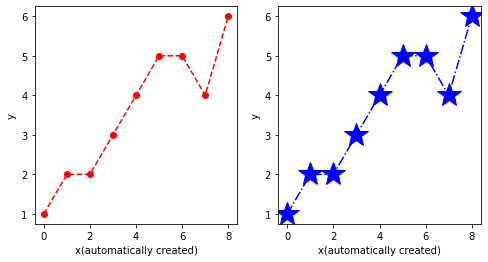

In [16]:
y=np.array([1,2,2,3,4,5,5,4,6])

fig=plt.figure(figsize=(8,4))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

ax1.plot(y, marker="o", color="red", linestyle="--")
ax1.set_xlabel("x(automatically created)")
ax1.set_ylabel("y")

ax2.plot(y, marker="*", color="#0000ff", linestyle="-.", markersize=25)
ax2.set_xlabel("x(automatically created)")
ax2.set_ylabel("y")

plt.show()

次に、ヒストグラムを作成しましょう。ヒストグラムの作成にはhist関数を使います。

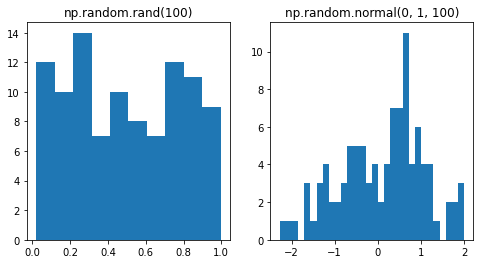

In [17]:
x=np.random.rand(100)
y=np.random.normal(0, 1, 100)

fig=plt.figure(figsize=(8,4))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

ax1.hist(x)
ax1.set_title("np.random.rand(100)")

ax2.hist(y, bins=30)
ax2.set_title("np.random.normal(0, 1, 100)")

plt.show()

binsを指定すると、ヒストグラムの細かさを指定できるようになります。

次は散布図について。scatter関数を使います。
scatter関数では、先ほども出てきたmarkerを指定する事ができます。

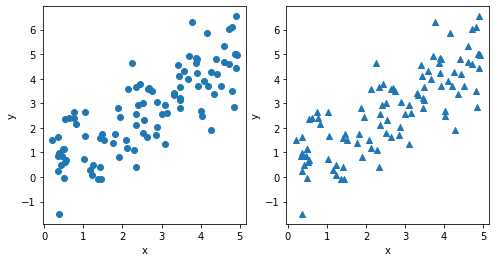

In [18]:
x=np.random.rand(100)*5
y=x+np.random.normal(0, 1, 100)

fig=plt.figure(figsize=(8,4))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

ax1.scatter(x, y)
ax1.set_xlabel("x")
ax1.set_ylabel("y")

ax2.scatter(x, y, marker="^")
ax2.set_xlabel("x")
ax2.set_ylabel("y")

plt.show()

y=xのグラフにノイズが乗っている。そんな散布図が出力されました。

次に、箱ひげ図を書きましょう。箱ひげ図の作成にはboxplot関数を使います。なお、箱ひげ図を複数書く場合、labelではなくlabelsという引数を指定してあげる必要があります。

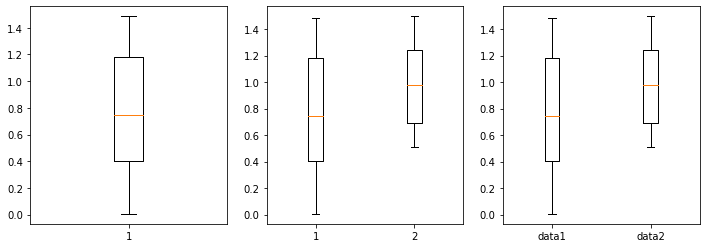

In [19]:
data1=np.random.rand(100)*1.5
data2=np.random.rand(100)+0.5

fig=plt.figure(figsize=(12,4))
ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)

ax1.boxplot(data1)

ax2.boxplot([data1, data2])

ax3.boxplot([data1, data2], labels=["data1", "data2"])

plt.show()

棒グラフの作成にはbar関数、あるいはbarh関数を使います。

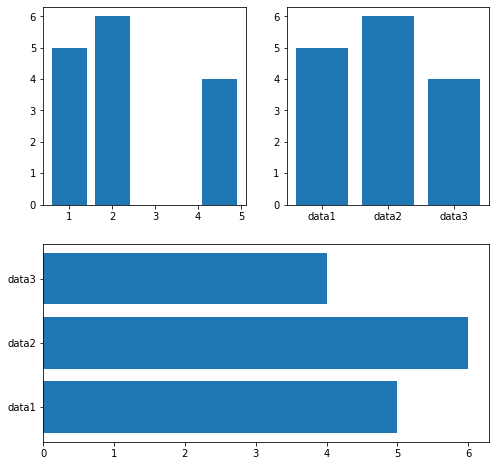

In [20]:
labelNumber=[1,2,4.5]
labelString=["data1","data2","data3"]
data=[5, 6, 4]

fig=plt.figure(figsize=(8,8))
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,(3,4))

ax1.bar(labelNumber, data)

ax2.bar(labelString, data)

ax3.barh(labelString, data)

plt.show()

エラーバー付きの折れ線グラフを作成するにはerrorbar関数を使う事が出来ます。また、errorだけを指定するとエラーバーは自動的に縦方向に伸びますが、xerr=というように指定すると、エラーバーが水平方向に描かれるようになります。なお、yerrとxerrの両方を指定する事も出来ます。

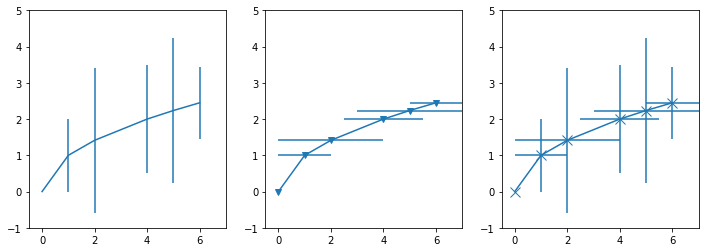

In [21]:
x=np.array([0, 1, 2, 4, 5, 6])
y=np.sqrt(x)
error=np.array([0, 1, 2, 1.5, 2, 1])

fig=plt.figure(figsize=(12,4))
ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)

ax1.errorbar(x, y, error)
ax1.set_xlim((-0.5, 7))
ax1.set_ylim((-1, 5))

ax2.errorbar(x, y, xerr=error, marker="v")
ax2.set_xlim((-0.5, 7))
ax2.set_ylim((-1, 5))

ax3.errorbar(x, y, error, error, marker="x", markersize=10)
ax3.set_xlim((-0.5, 7))
ax3.set_ylim((-1, 5))

plt.show()

なお、エラーバーの上下の長さを変える事も出来ます。その時は、下のようにerrorを指定する配列を「下向きのエラーバーの長さ」「上向きのエラーバーの長さ」というように指定します。

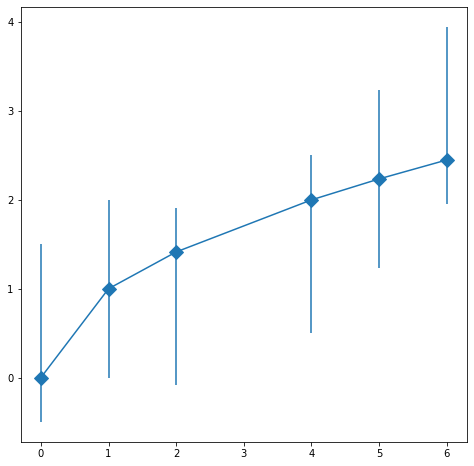

In [22]:
x=np.array([0, 1, 2, 4, 5, 6])
y=np.sqrt(x)
error=np.array([[0.5,1,1.5,1.5,1,0.5],[1.5,1,0.5,0.5,1,1.5]])

fig=plt.figure(figsize=(8,8))
ax1=fig.add_subplot(1,1,1)

ax1.errorbar(x, y, error, marker="D", markersize=10)

plt.show()

最後に、違う座標軸だけど、同じ場所に書きたいと言う時。今回の例では、雨温図を作成しているのですが、このような場合はax.twinxという関数を使う事が出来ます。ax2=ax1.twinx()とすると、ax2はax1とx座標軸を共有して生成されます。

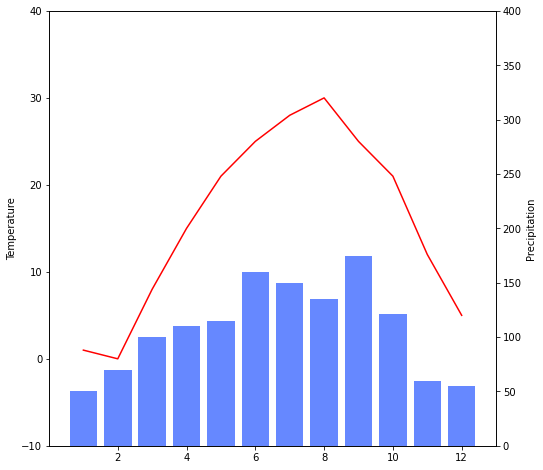

In [23]:
month=np.arange(12)+1
temp=np.array([1, 0, 8, 15, 21, 25, 28, 30, 25, 21, 12, 5])
rain=np.array([50, 70, 100, 110, 115, 160, 150, 135, 175, 121, 60, 55])

fig=plt.figure(figsize=(8,8))
ax1=fig.add_subplot(1,1,1)
ax2=ax1.twinx()

ax1.plot(month, temp, color="#ff0000")
ax1.set_ylim((-10, 40))
ax1.set_ylabel("Temperature")

ax2.bar(month, rain, color="#6688ff")
ax2.set_ylim((0, 400))
ax2.set_ylabel("Precipitation")

plt.show()

最後に、今までの集大成として、色々なグラフを使った図を作ってみましょう。この例では、学生の点数(Score)は興味の有無(Interest)と賢さ(Intelligence)と真面目さ(Diligence)によって決まるというモデルを作成しました。<br>
※あくまで例です。実際にはこんな単純ではないでしょう

In [24]:
N=300
Interest=np.random.randint(0, 2, N)
Intelligence=np.random.normal(50, 16, N)
Intelligence[Intelligence<0] = 0
Intelligence[Intelligence>100] = 100
Diligence=np.random.normal(50, 16, N)
Diligence[Diligence<0] = 0
Diligence[Diligence>100] = 100

Score=(Interest*10+Intelligence*0.55+Diligence*0.40+np.random.normal(0, 10, N)).astype(np.uint8)
Score[Score>100]=100

figureを縦2個に分割し、横には4つ/または3つに分割しました。axup1～axup4は縦2個で横4個の分割方法で、axdown1～axdoen3は縦2個で横3個の分割方法ですね。

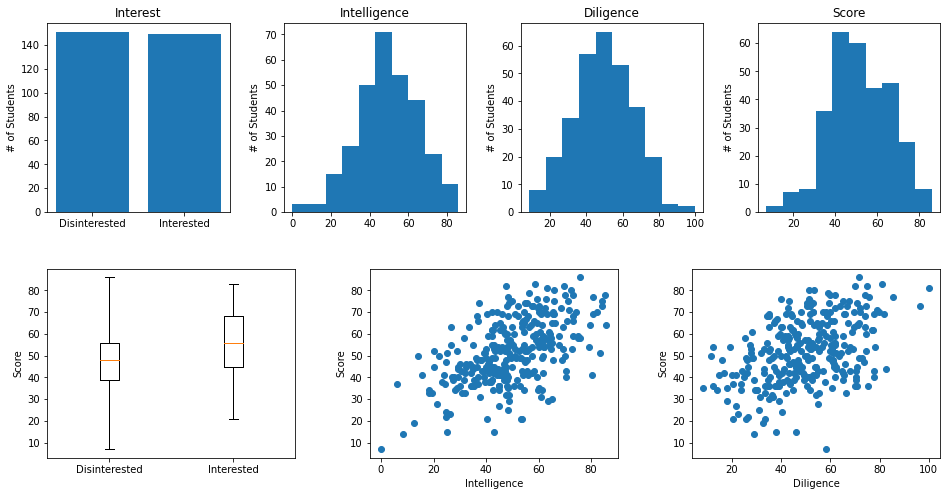

In [25]:
fig=plt.figure(figsize=(16,8))
fig.subplots_adjust(wspace=0.3, hspace=0.3)

axup1=fig.add_subplot(2,4,1)
axup2=fig.add_subplot(2,4,2)
axup3=fig.add_subplot(2,4,3)
axup4=fig.add_subplot(2,4,4)

axdown1=fig.add_subplot(2,3,4)
axdown2=fig.add_subplot(2,3,5)
axdown3=fig.add_subplot(2,3,6)

axup1.bar(["Disinterested", "Interested"], [np.sum([Interest==0]), np.sum(Interest==1)])
axup1.set_ylabel("# of Students")
axup1.set_title("Interest")

axup2.hist(Intelligence)
axup2.set_title("Intelligence")
axup2.set_ylabel("# of Students")

axup3.hist(Diligence)
axup3.set_title("Diligence")
axup3.set_ylabel("# of Students")

axup4.hist(Score)
axup4.set_title("Score")
axup4.set_ylabel("# of Students")

data=np.array([Score[Interest==0], Score[Interest==1]], dtype="object")
axdown1.boxplot(data, labels=["Disinterested", "Interested"], whis=(0, 100))
axdown1.set_ylabel("Score")

axdown2.scatter(Intelligence, Score)
axdown2.set_xlabel("Intelligence")
axdown2.set_ylabel("Score")

axdown3.scatter(Diligence, Score)
axdown3.set_xlabel("Diligence")
axdown3.set_ylabel("Score")

plt.show()